In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Create dataset
Use Sam to extract proposals from input images (100 images) then for proposals with same regions as the ground truth masks, they are considered as positive sameple to the templates ( use the BlenderProc 42 templates), negative otherwise

Run through 100 images - then return positive proposals and negative proposals

Use IoU >0.5 to get the postive proposals

## 1.1 Extract positive proposals (the same ones as gt mask)

In [20]:
# # this is the one we use
# from src.model.constrastive_learning import extract_dataset_train_pbr_icbin_obj2

# dataset = "icbin"
# data_type = "train_pbr"
# scene_id = 0
# target_object_id = 2
# pos_proposals, neg_proposals, best_mask_indices = extract_dataset_train_pbr_icbin_obj2(dataset, data_type, scene_id, target_object_id) # Take 2.21 minutes

In [21]:
# all_pos_proposals = [item for sublist in pos_proposals for item in sublist if item["rgb"] is not None]
# all_neg_proposals = [item for sublist in neg_proposals for item in sublist]
# print("len(all_pos_proposals), len(all_neg_proposals)", len(all_pos_proposals), len(all_neg_proposals))

In [22]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(0, 200, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(all_pos_proposals):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(all_pos_proposals[image_index]["rgb"]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [23]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(0, 200, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(all_neg_proposals):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(all_neg_proposals[image_index]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [24]:
# import pickle
# # train_pbr_pos_proposals_obj_2_filtered means dataset with neg only from background not from object 1 
# # train_pbr_pos_proposals_obj_2_filtered_self_rendered is like train_pbr_pos_proposals_obj_2_filtered but the dataset now is render from prbr selbts not from given dataset

# with open('contrastive_learning/outputs/train_pbr_pos_proposals_obj_2_filtered_self_rendered.pkl', 'wb') as file:
#     pickle.dump(all_pos_proposals, file)

# with open('contrastive_learning/outputs/train_pbr_neg_proposals_obj_2_filtered_self_rendered.pkl', 'wb') as file:
#     pickle.dump(all_neg_proposals, file)

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pickle

# train_pbr_neg_proposals_sam_inside_100_pre_filter is the best one to choose

with open('contrastive_learning/outputs/train_pbr_pos_proposals_sam_inside_100_pre_filter.pkl', 'rb') as file:
    pos_obj_1 = pickle.load(file)

pos_obj_1_without_pose = [p["rgb"] for p in pos_obj_1]

In [41]:
import pickle

# train_pbr_neg_proposals_sam_inside_100_pre_filter is the best one to choose

with open('contrastive_learning/outputs/train_pbr_pos_proposals_obj_2_filtered_self_rendered.pkl', 'rb') as file:
    pos = pickle.load(file)

with open('contrastive_learning/outputs/train_pbr_neg_proposals_obj_2_filtered_self_rendered.pkl', 'rb') as file:
    neg = pickle.load(file)

In [43]:
neg_include_obj_1 = neg + pos_obj_1_without_pose

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(90, 150, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(neg):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(pos[image_index]["rgb"]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [35]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(150, 250, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(neg):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(pos_obj_1_without_pose[image_index]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [47]:
len(pos)

1760

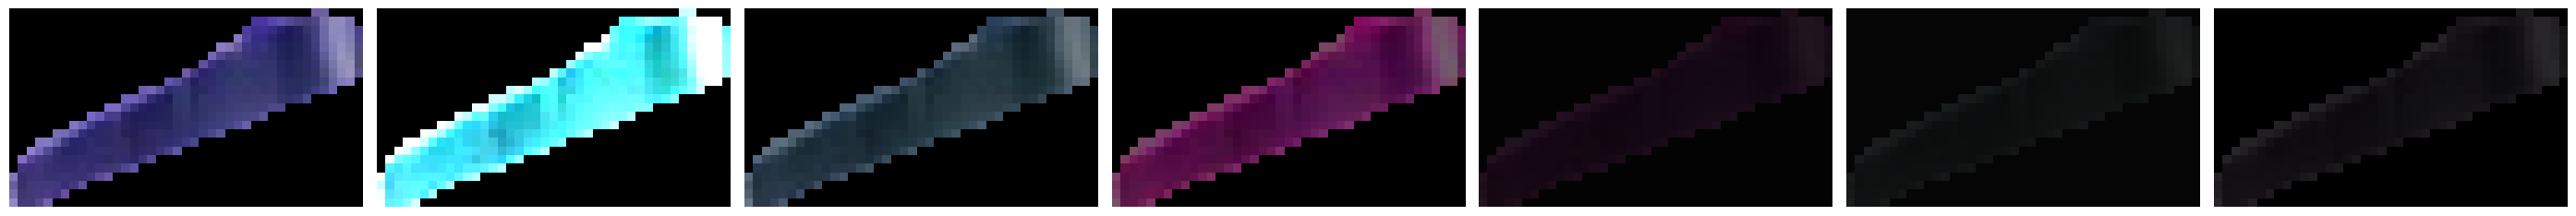

In [48]:
import torchvision.transforms as transforms
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

def plot_images(images, titles=None):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(n*4, 4))
    if n == 1:
        axes = [axes]
    for i, (ax, img) in enumerate(zip(axes, images)):
        ax.imshow(img)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

jitter_strength =1
color_jitter = transforms.ColorJitter(
    0.8 * jitter_strength,
    0.8 * jitter_strength,
    0.8 * jitter_strength,
    0.2 * jitter_strength
)

orig_img = Image.fromarray((pos[0]["rgb"] * 255).astype(np.uint8))
jittered_imgs = [color_jitter(orig_img) for _ in range(6)]
plot_images([orig_img] + jittered_imgs)


## 1.2 Create positive and negative pairs
Positive pairs (positive proposal and template with most similar pose)

In [49]:
import torch

from src.model.constrastive_learning import ContrastiveLearningModel


# template_paths = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/obj_000001/*.png"
# template_poses_path = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/template_poses.npy"
template_paths = "foundpose_analysis/icbin/templates/train_pbr/obj_000002_original/*.png"
template_poses_path = "foundpose_analysis/icbin/templates/train_pbr/obj_000002_original/poses.pkl"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ContrastiveLearningModel(device)
# model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/best_model_checkpoint.pth"))

Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-10-04 17:00:52,488] [INFO] dinov2: using MLP layer as FFN


In [50]:
from src.model.constrastive_learning import prepare_dataset
train_dataset, val_dataset, test_dataset, train_negative_pairs, train_postive_pairs = prepare_dataset(
    template_paths, template_poses_path, pos[:1000], neg_include_obj_1[:] # build only 1000 postive images
    )

  0%|          | 0/1000 [00:00<?, ?it/s][2024-10-04 17:01:02,331] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 23, 41)
[2024-10-04 17:01:02,333] [INFO] src.model.constrastive_learning_utils: pos_pair['img1'].shape[-1], pos_pair['img2'].shape[-1]: 224, 224
[2024-10-04 17:01:02,334] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 60, 110)
[2024-10-04 17:01:02,336] [INFO] src.model.constrastive_learning_utils: pos_pair['img1'].shape[-1], pos_pair['img2'].shape[-1]: 224, 224
[2024-10-04 17:01:02,336] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 80, 144)
[2024-10-04 17:01:02,337] [INFO] src.model.constrastive_learning_utils: pos_pair['img1'].shape[-1], pos_pair['img2'].shape[-1]: 224, 224
[2024-10-04 17:01:02,338] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 73, 97)
[2024-10-04 17:01:02,340] [INFO] src.model.constrastive_learning_utils: pos_pair['img1'].shape[-1], pos_pair['img2'].shape[

In [51]:
len(train_dataset) + 2*len(val_dataset)

11116

In [52]:
from torch.utils.data import DataLoader, Dataset


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=1)

[2024-10-04 17:08:24,536] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.430849673202614].
[2024-10-04 17:08:24,543] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.273986928104575].
[2024-10-04 17:08:24,548] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4657080610021787].
[2024-10-04 17:08:24,553] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:24,559] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

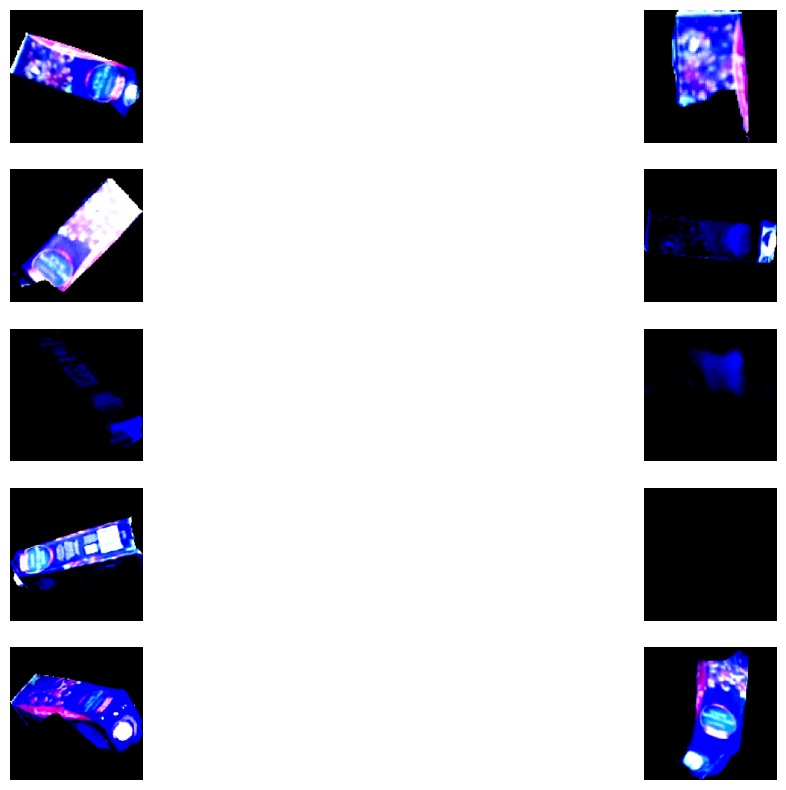

[2024-10-04 17:08:24,651] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:24,657] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:24,663] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].
[2024-10-04 17:08:24,670] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.0474074074074076].
[2024-10-04 17:08:24,677] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

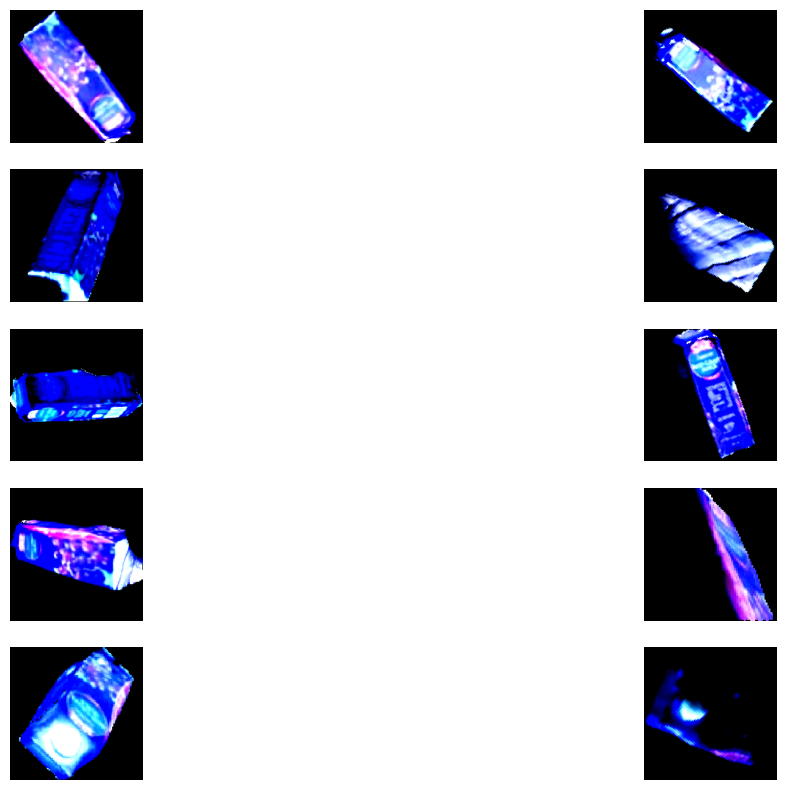

[2024-10-04 17:08:24,778] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:24,785] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2391285403050105].
[2024-10-04 17:08:24,791] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3785620915032677].
[2024-10-04 17:08:24,798] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.5877124183006535].
[2024-10-04 17:08:24,804] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

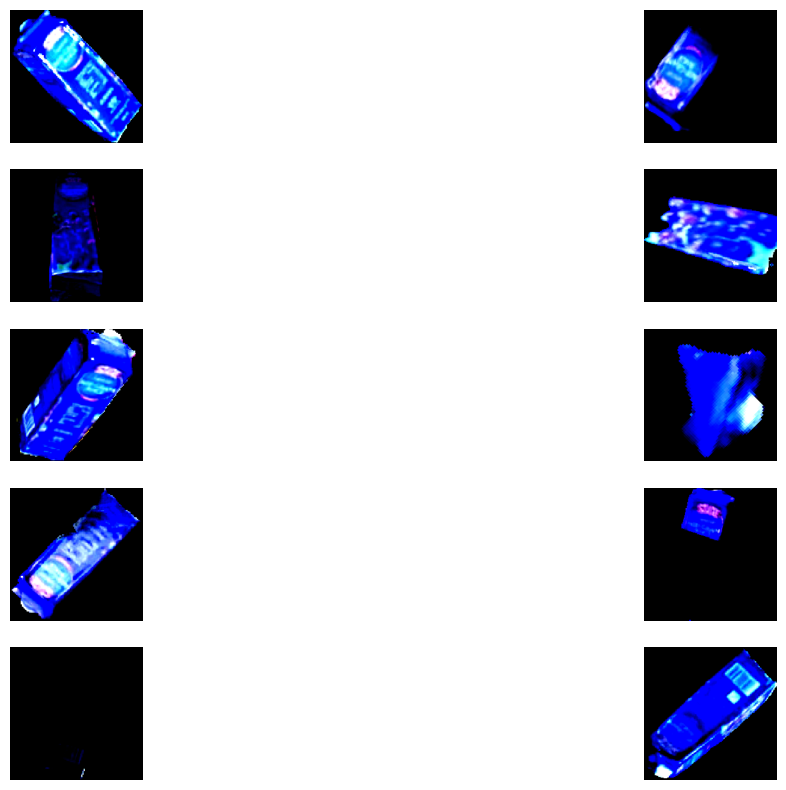

[2024-10-04 17:08:25,114] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:25,120] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.7336819172113285].
[2024-10-04 17:08:25,125] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-04 17:08:25,130] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.7336819172113285].
[2024-10-04 17:08:25,138] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

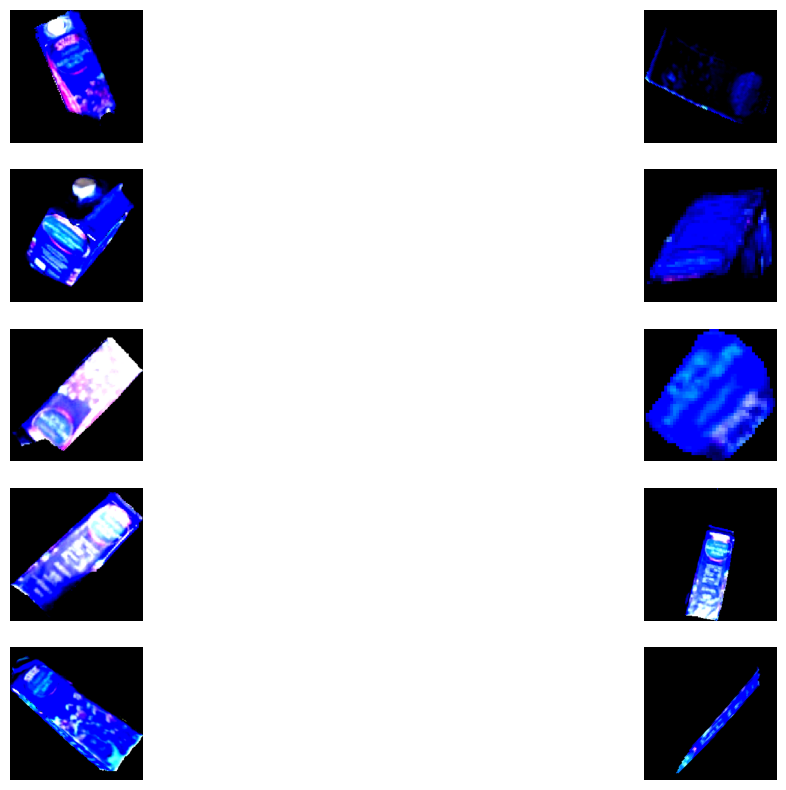

In [53]:
import matplotlib.pyplot as plt

# Define the number of pairs to show at a time
pairs_per_page = 5

# Iterate over the specified range of pairs, in steps of `pairs_per_page`
for i in range(20, 40, pairs_per_page):
    # Create a new figure for each set of 5 pairs
    plt.figure(figsize=(15, 10))  # Adjusted the figsize for multiple pairs

    for j in range(pairs_per_page):
        # Calculate the current pair index
        pair_index = i + j

        # Check if the pair_index is within the bounds of the list
        if pair_index >= len(train_postive_pairs):
            break

        pair = train_postive_pairs[pair_index]

        # First image in the pair (img2)
        plt.subplot(pairs_per_page, 2, 2*j + 1)
        plt.imshow(pair["img2"].permute(1, 2, 0))
        plt.axis('off')

        # Second image in the pair (img1)
        plt.subplot(pairs_per_page, 2, 2*j + 2)
        plt.imshow(pair["img1"].permute(1, 2, 0))
        plt.axis('off')

    # Display the figure containing 5 pairs
    plt.show()


[2024-10-04 17:08:33,119] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3262745098039215].
[2024-10-04 17:08:33,126] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.535424836601307].


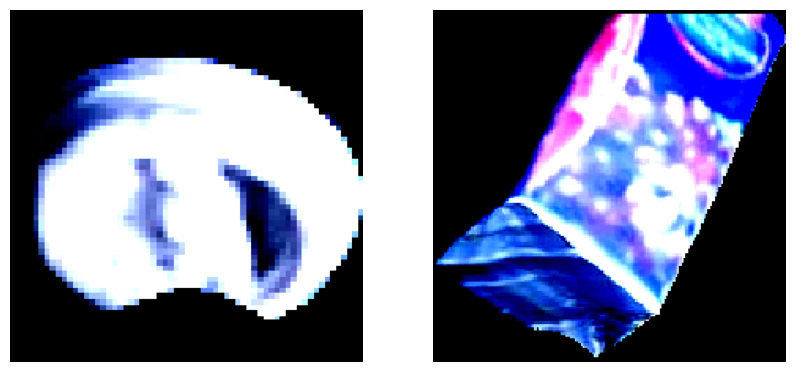

[2024-10-04 17:08:33,171] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.0105042016806722].
[2024-10-04 17:08:33,177] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6225708061002178].


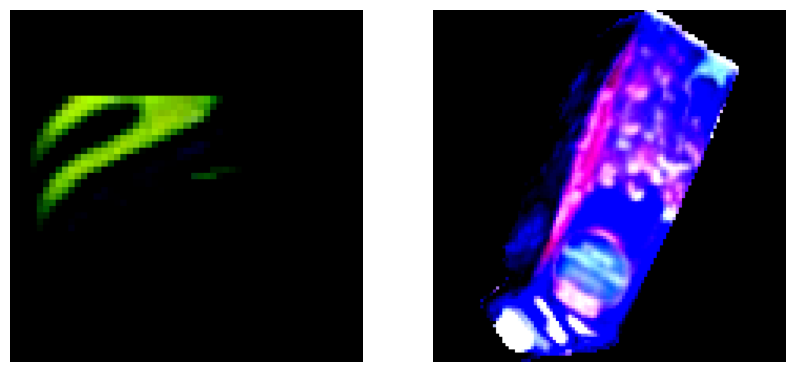

[2024-10-04 17:08:33,212] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.256557734204793].
[2024-10-04 17:08:33,219] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


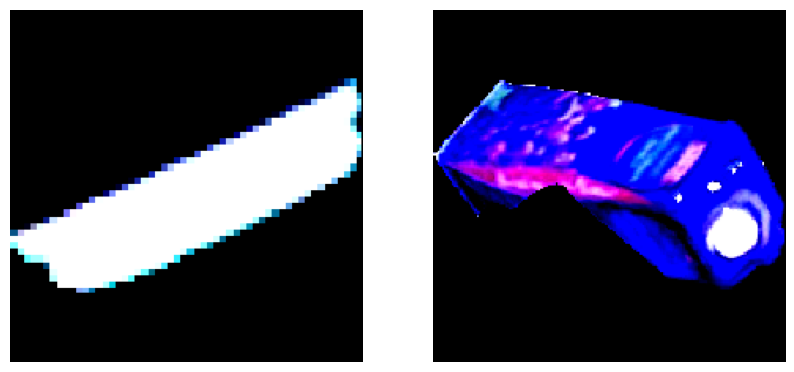

[2024-10-04 17:08:33,254] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.350239651416122].
[2024-10-04 17:08:33,260] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


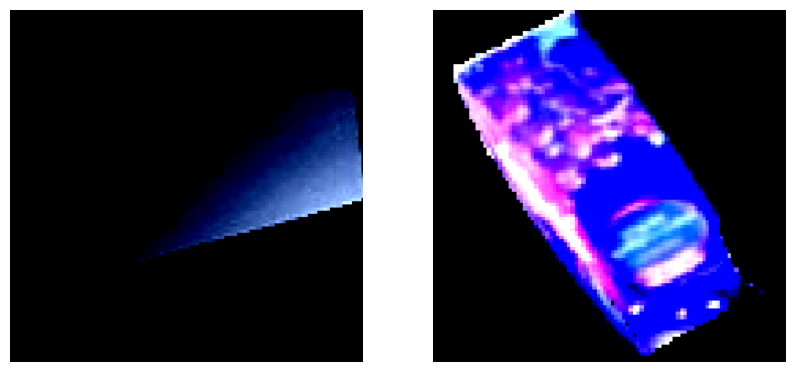

[2024-10-04 17:08:33,298] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3437037037037034].
[2024-10-04 17:08:33,303] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.535424836601307].


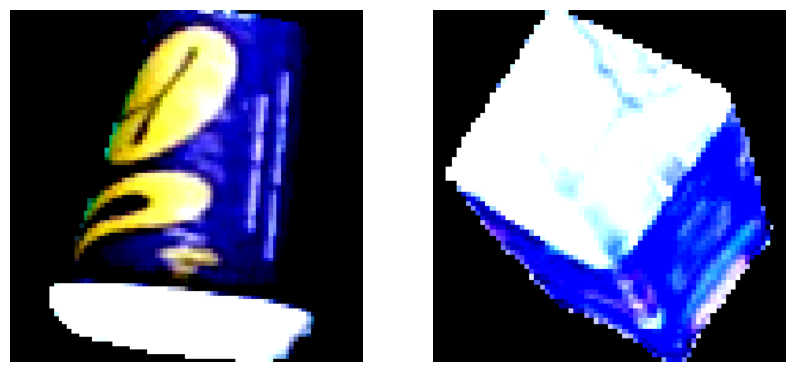

[2024-10-04 17:08:33,341] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.2556725747067388].
[2024-10-04 17:08:33,348] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


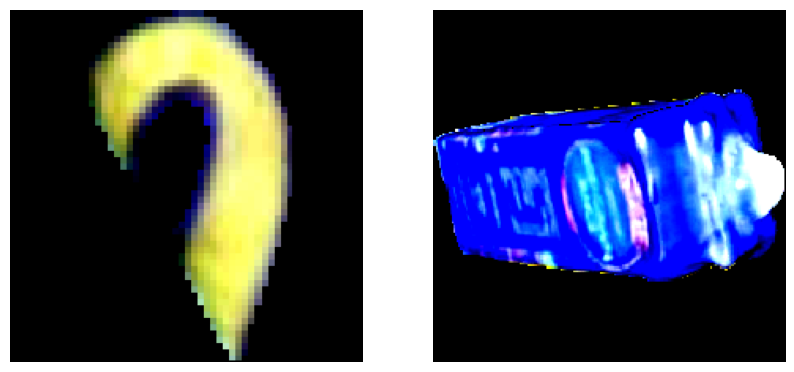

[2024-10-04 17:08:33,388] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.1345533769063176].
[2024-10-04 17:08:33,393] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4657080610021787].


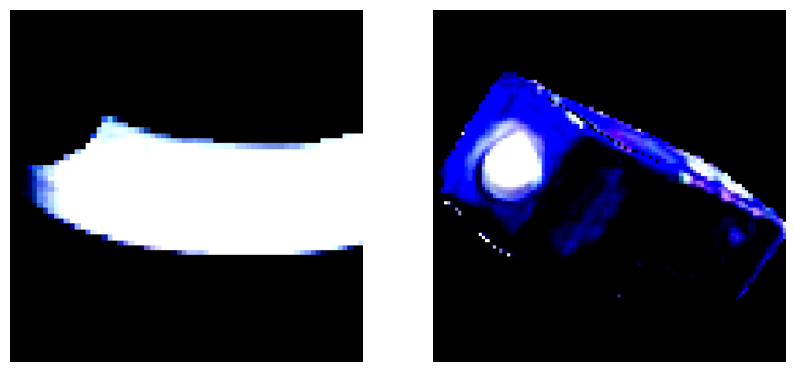

[2024-10-04 17:08:33,428] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.4558605664488018].
[2024-10-04 17:08:33,434] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


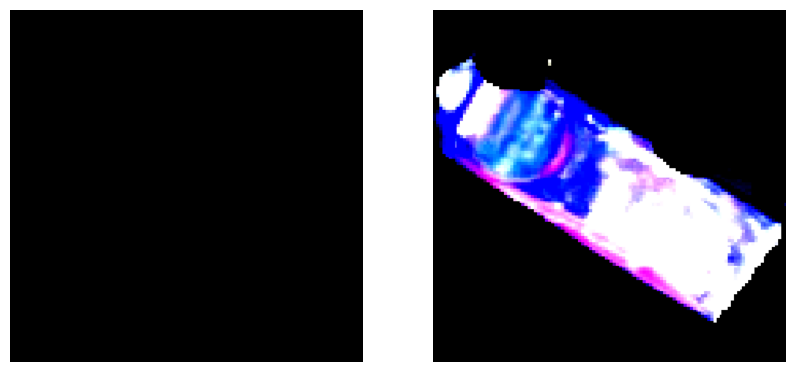

[2024-10-04 17:08:33,470] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.5877124183006535].
[2024-10-04 17:08:33,477] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


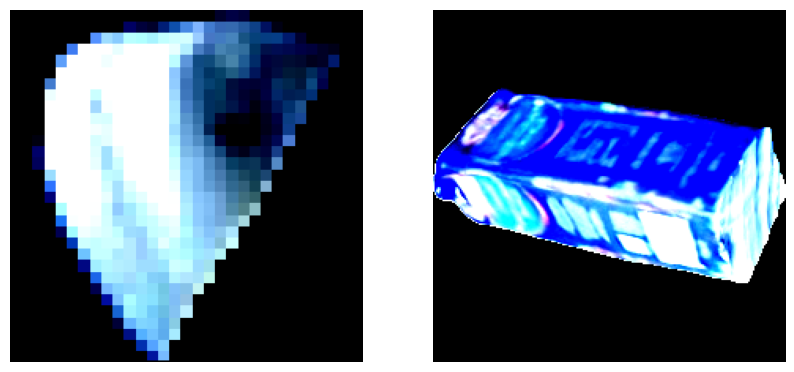

[2024-10-04 17:08:33,524] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8382570806100216].
[2024-10-04 17:08:33,531] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


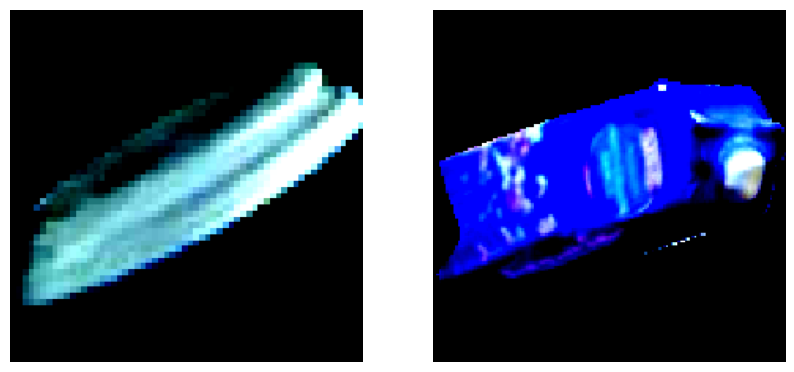

[2024-10-04 17:08:33,571] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.500566448801743].
[2024-10-04 17:08:33,577] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.3850980392156862].


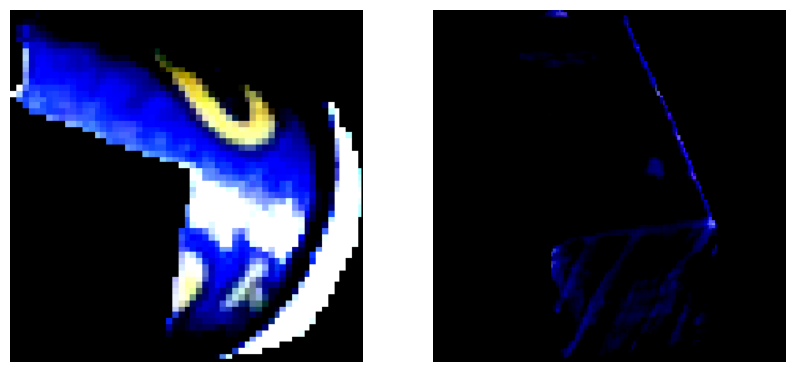

[2024-10-04 17:08:33,609] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8556862745098035].
[2024-10-04 17:08:33,615] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3959912854030496].


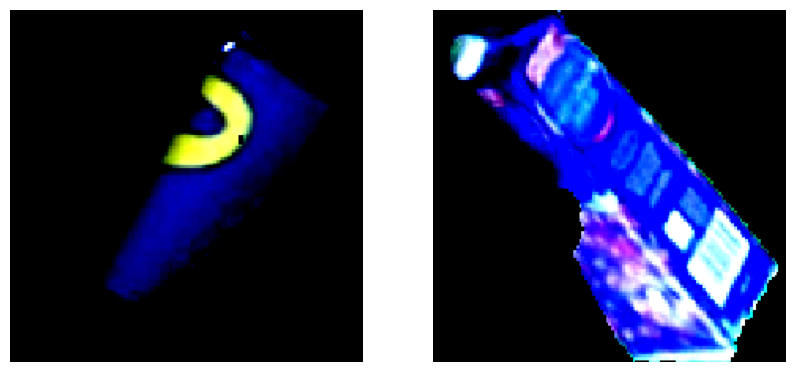

[2024-10-04 17:08:33,666] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.8529411764705883].
[2024-10-04 17:08:33,675] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4657080610021787].


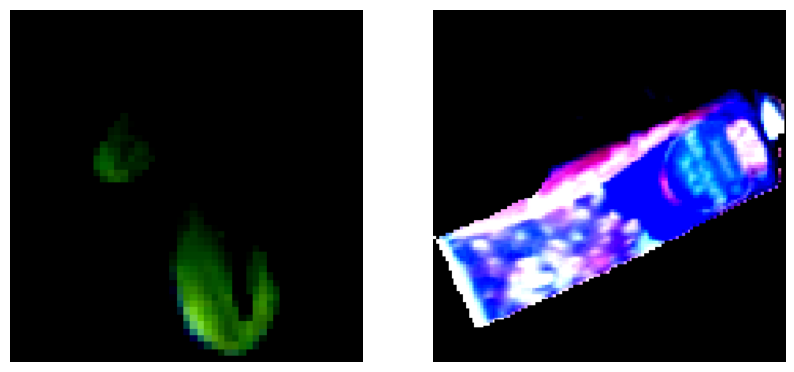

[2024-10-04 17:08:33,712] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.1855742296918765].
[2024-10-04 17:08:33,719] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


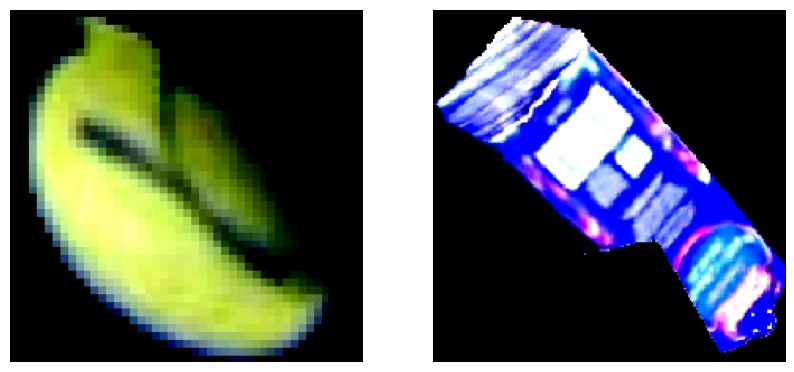

[2024-10-04 17:08:33,757] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.4907189542483663].
[2024-10-04 17:08:33,762] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


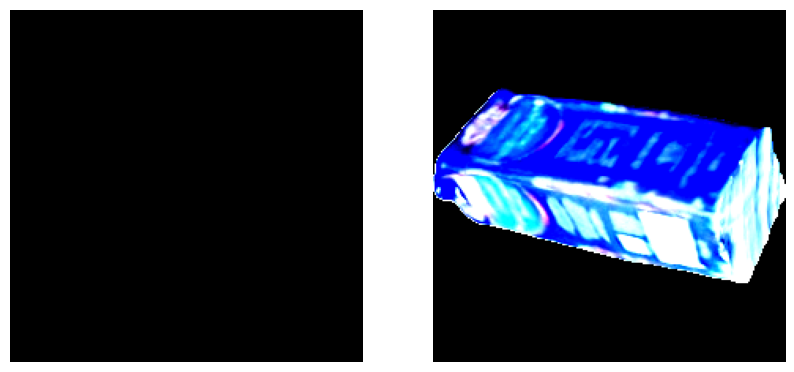

[2024-10-04 17:08:33,804] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3088453159041396].
[2024-10-04 17:08:33,812] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.535424836601307].


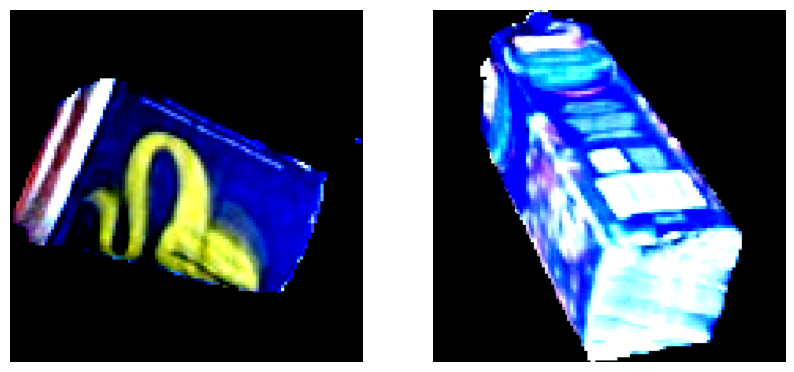

[2024-10-04 17:08:33,855] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.9404761904761902].
[2024-10-04 17:08:33,862] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


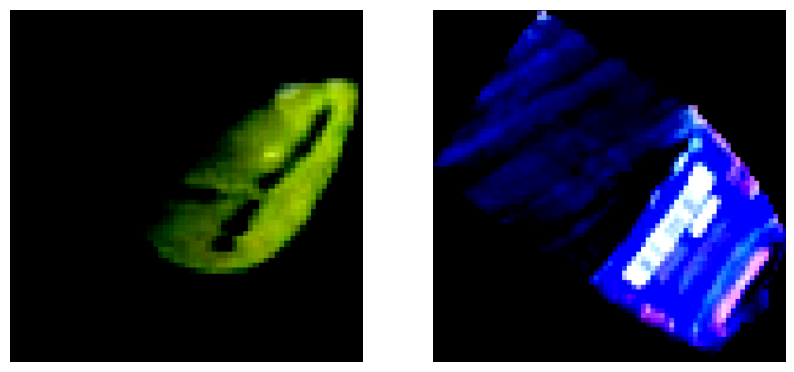

[2024-10-04 17:08:33,897] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.1855742296918765].
[2024-10-04 17:08:33,902] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


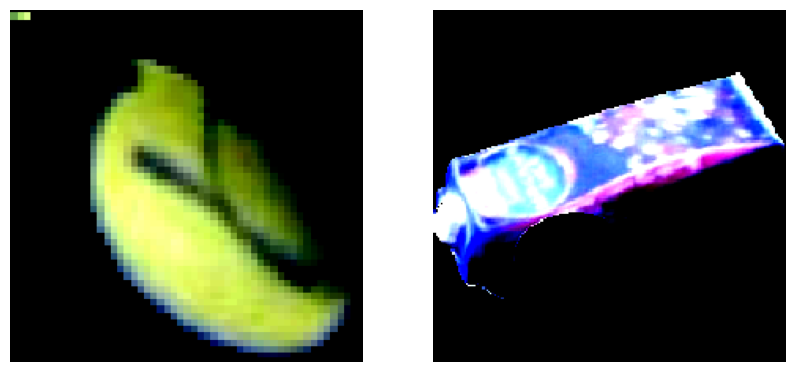

[2024-10-04 17:08:33,939] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.5532212885154062].
[2024-10-04 17:08:33,947] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.570283224400871].


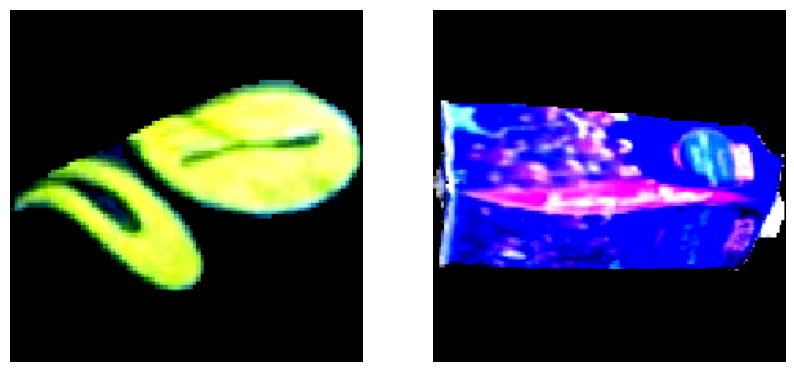

[2024-10-04 17:08:33,989] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.7107843137254901].
[2024-10-04 17:08:33,994] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.273986928104575].


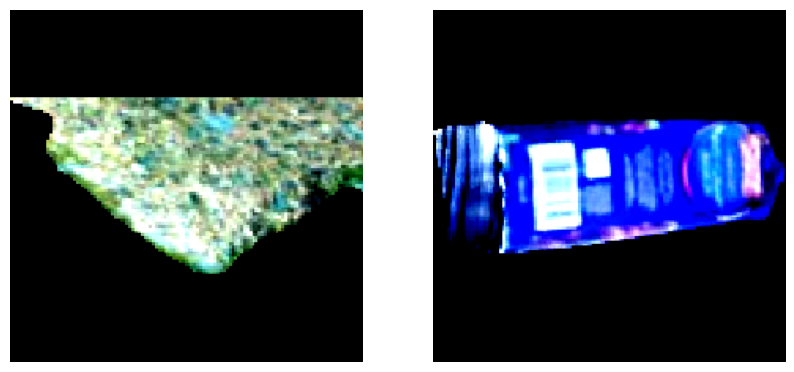

[2024-10-04 17:08:34,037] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.0648366013071895].
[2024-10-04 17:08:34,043] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.552854030501089].


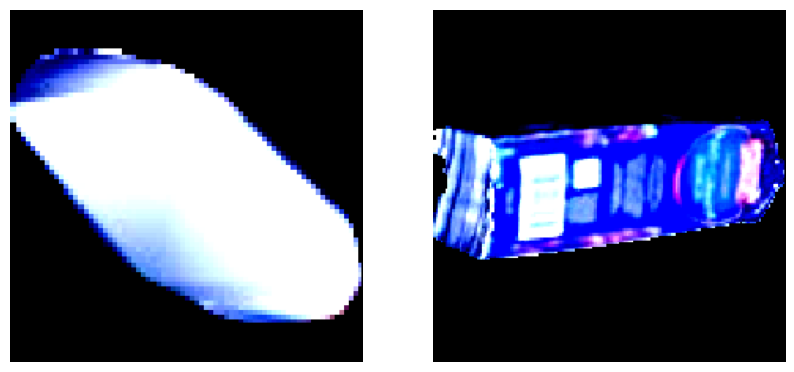

[2024-10-04 17:08:34,080] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.6465359477124182].
[2024-10-04 17:08:34,086] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


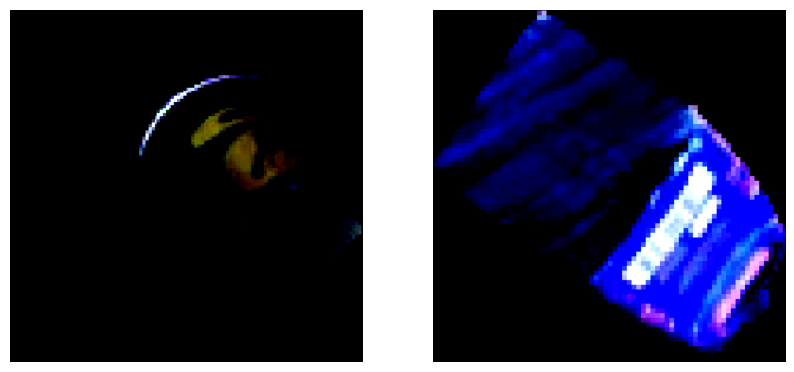

[2024-10-04 17:08:34,122] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.570283224400871].
[2024-10-04 17:08:34,129] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.012549019607843].


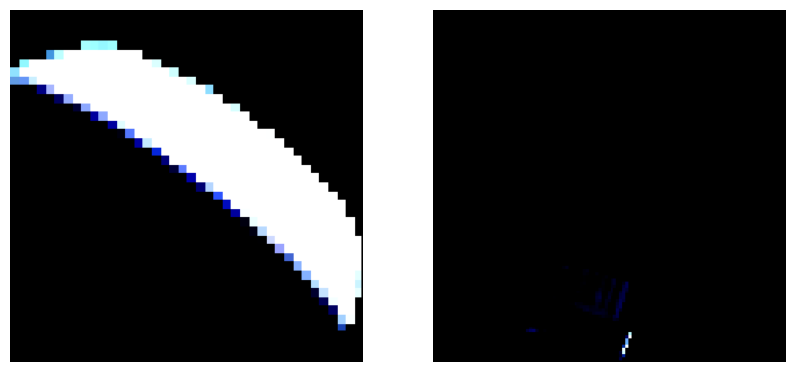

[2024-10-04 17:08:34,167] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.6639651416122003].
[2024-10-04 17:08:34,173] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.1868409586056643].


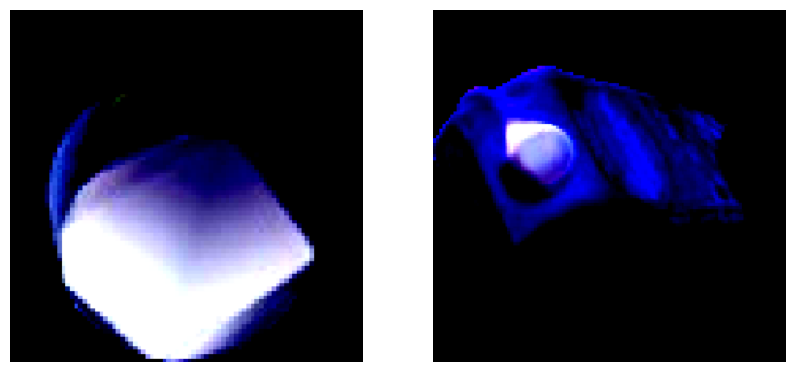

[2024-10-04 17:08:34,210] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3437037037037034].
[2024-10-04 17:08:34,217] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


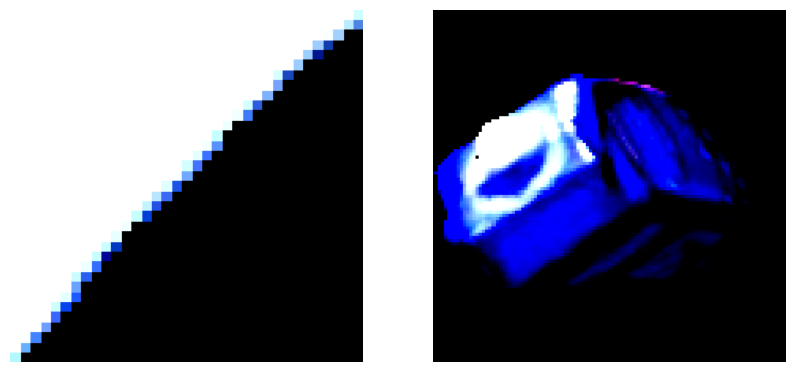

[2024-10-04 17:08:34,249] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.6232492997198877].
[2024-10-04 17:08:34,255] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.500566448801743].


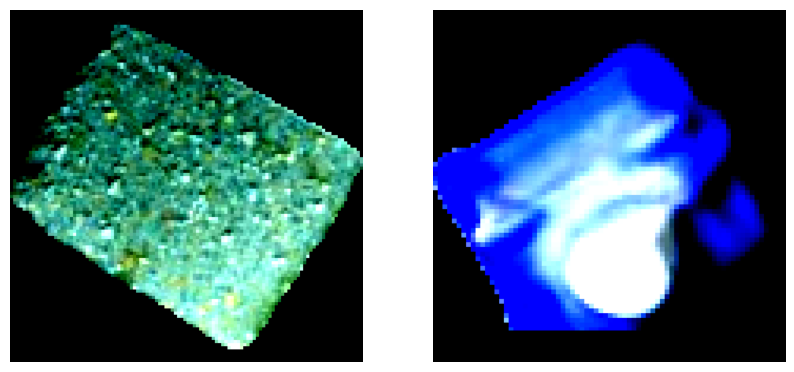

[2024-10-04 17:08:34,299] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.6988235294117644].
[2024-10-04 17:08:34,306] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.535424836601307].


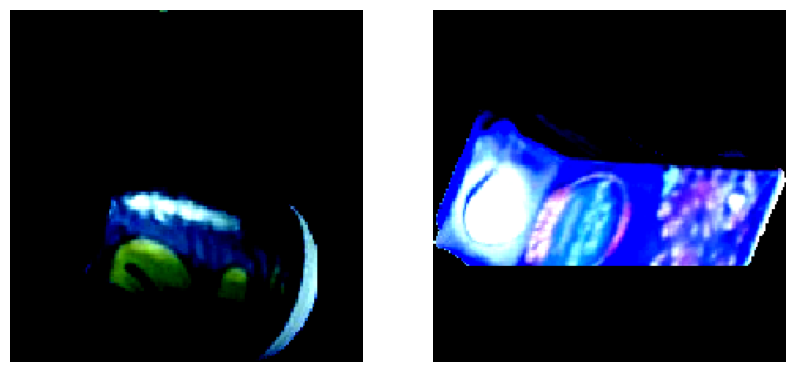

[2024-10-04 17:08:34,345] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.5081481481481482].
[2024-10-04 17:08:34,350] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


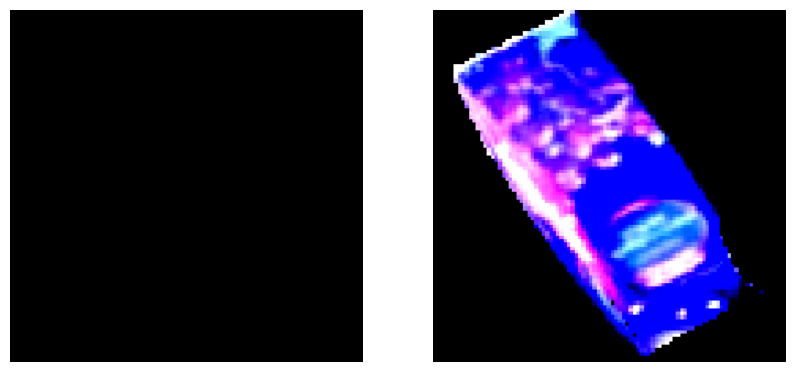

[2024-10-04 17:08:34,382] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.5125438821816939].
[2024-10-04 17:08:34,389] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.552854030501089].


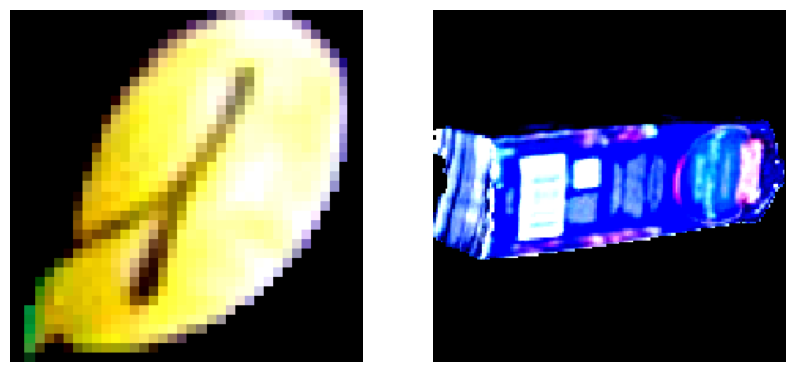

[2024-10-04 17:08:34,423] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.7457983193277309].
[2024-10-04 17:08:34,429] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2216993464052286].


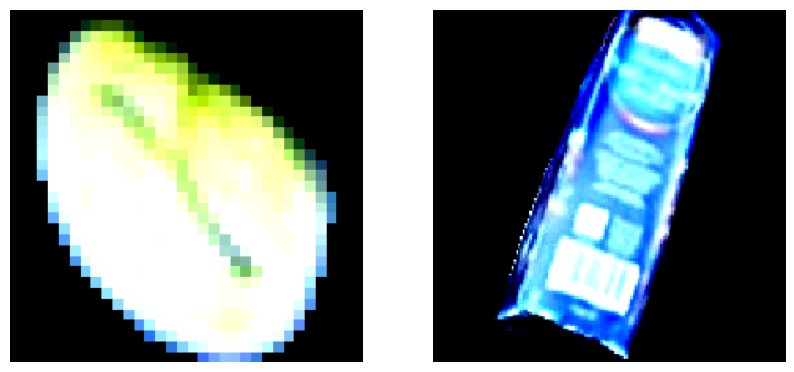

[2024-10-04 17:08:34,469] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.7478991596638654].
[2024-10-04 17:08:34,476] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


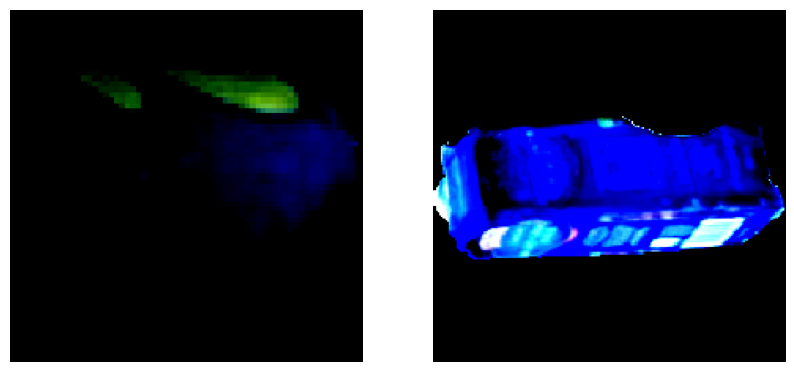

[2024-10-04 17:08:34,513] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3785620915032677].
[2024-10-04 17:08:34,520] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.500566448801743].


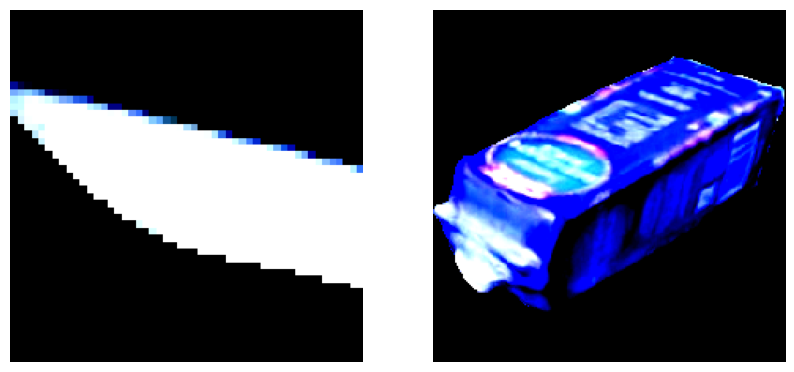

[2024-10-04 17:08:34,570] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.2727973285384024].
[2024-10-04 17:08:34,575] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


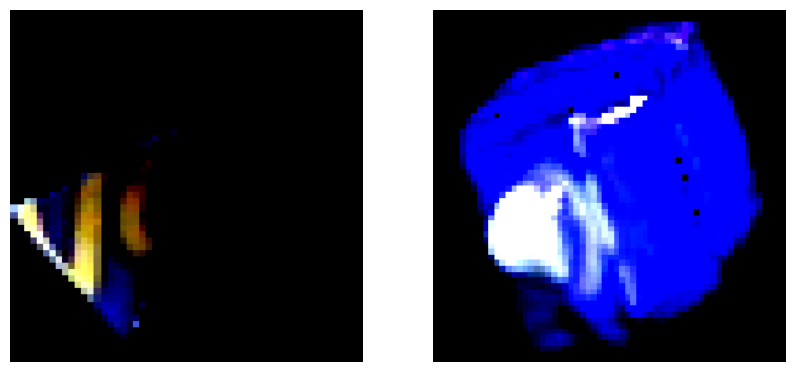

[2024-10-04 17:08:34,604] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.2966863601335733].
[2024-10-04 17:08:34,610] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.273986928104575].


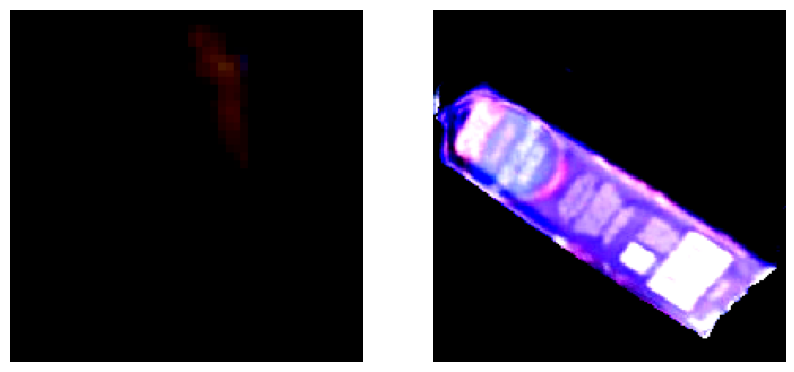

[2024-10-04 17:08:34,646] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.22818734480691835].
[2024-10-04 17:08:34,651] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.413420479302832].


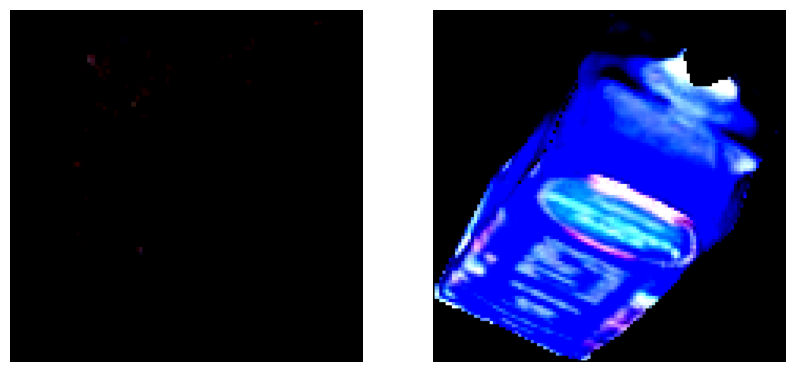

[2024-10-04 17:08:34,684] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].
[2024-10-04 17:08:34,690] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].


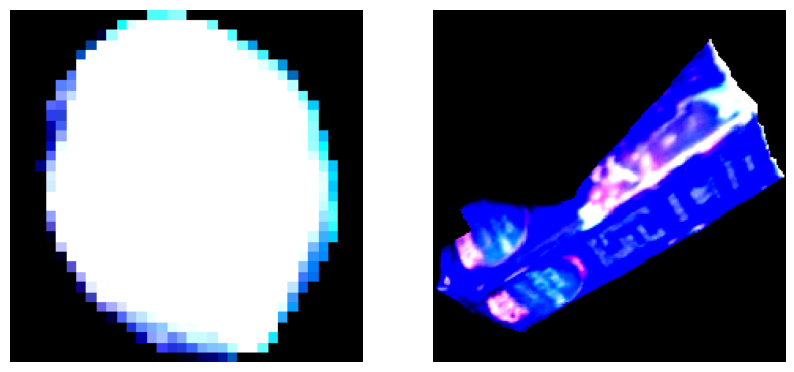

[2024-10-04 17:08:34,725] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3088453159041396].
[2024-10-04 17:08:34,732] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3785620915032677].


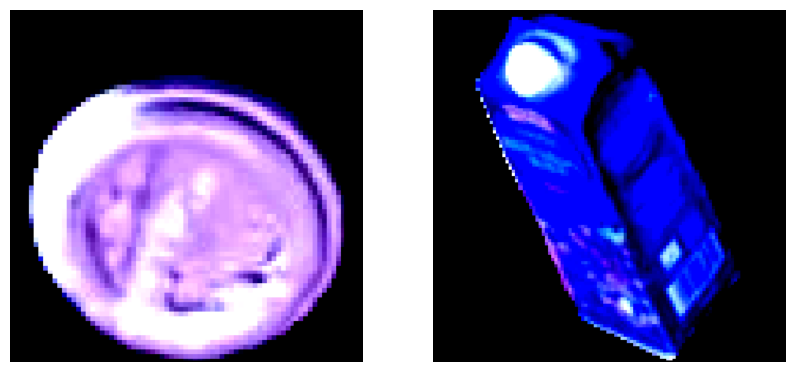

[2024-10-04 17:08:34,769] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.0365141612200433].
[2024-10-04 17:08:34,777] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.012549019607843].


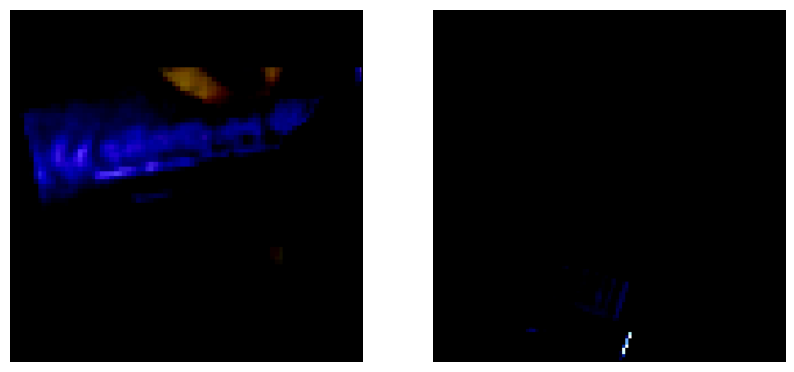

[2024-10-04 17:08:35,032] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6225708061002178].
[2024-10-04 17:08:35,038] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


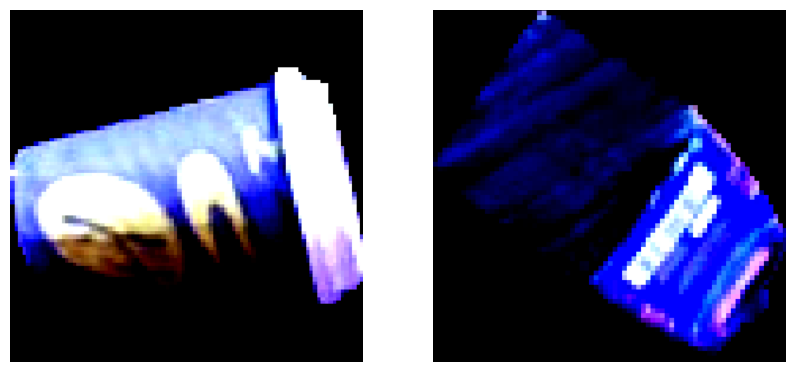

[2024-10-04 17:08:35,073] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2042701525054467].
[2024-10-04 17:08:35,079] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8556862745098035].


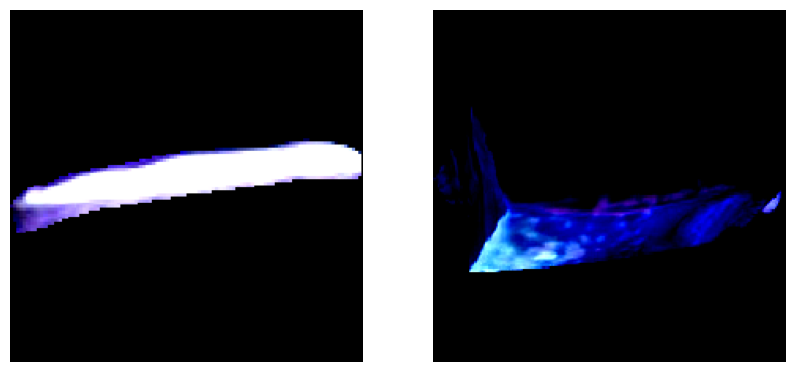

In [54]:
import matplotlib.pyplot as plt
for pair in train_negative_pairs[:40]:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(pair["img1"].permute(1,2,0))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(pair["img2"].permute(1,2,0))
    plt.axis('off')

    plt.show()

In [55]:
from src.model.constrastive_learning import train_contrastive_loss, train_contrastive_loss_hard_case_mining
dataset = "icbin"
train_contrastive_loss(device, model, train_loader, val_loader, num_epochs=6, dataset=dataset)
# train_contrastive_loss(device, model, train_dataset, val_dataset, test_dataset, num_epochs=25) # this time train_pbr

Training:   0%|          | 0/6 [00:00<?, ?it/s]/home/cuong.van-dam/miniconda3/envs/cnos/lib/python3.9/site-packages/xformers/ops/unbind.py:46: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_data_ptr = tensors[0].storage().data_ptr()
/home/cuong.van-dam/miniconda3/envs/cnos/lib/python3.9/site-packages/xformers/ops/unbind.py:48: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if x.storage().data_ptr() != storage_data_ptr:
[2024-10-04 17:19:01,191] [INFO] src.model.constrastive_learning: Epoch 1/6 loss: 1.05094

best_val_loss:  0.08989907693467103
saving best model at epoch:  0


Training:  50%|█████     | 3/6 [30:53<30:40, 613.41s/it][2024-10-04 17:49:51,615] [INFO] src.model.constrastive_learning: Epoch 4/6 loss: 0.15742
[2024-10-04 17:50:24,025] [INFO] src.model.constrastive_learning: Epoch 4/6 Validation Loss: 0.04145


best_val_loss:  0.04144826634006454
saving best model at epoch:  3


Training:  67%|██████▋   | 4/6 [44:46<22:23, 671.56s/it]


KeyboardInterrupt: 

# 3. Test

In [9]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import glob
import torchvision.transforms as T
import torch

from src.model.constrastive_learning import ContrastiveLearningModel
from src.model.constrastive_learning_utils import resize_and_pad_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = ContrastiveLearningModel(device)
model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/icbin_best_model_checkpoint.pth"))
model = model.to(device)

labels = torch.tensor([test_dataset[i][2] for i in range(len(test_dataset))]).to(device).to(torch.float32)
img1 = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))]).to(device).to(torch.float32)
img2 = torch.stack([test_dataset[i][1] for i in range(len(test_dataset))]).to(device).to(torch.float32)


Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-10-03 12:09:20,025] [INFO] dinov2: using MLP layer as FFN


In [10]:
# torch.cuda.empty_cache()
# del model
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    test_loss = 0.0
    
    output1, output2 = model(img1, img2)

euclidean_distance = nn.functional.pairwise_distance(output1, output2)
euclidean_distance


tensor([0.0668, 0.8199, 0.0710,  ..., 2.1058, 2.7655, 2.2688], device='cuda:0')

In [17]:
pos = torch.sum(torch.where(euclidean_distance<1,1,0))
neg = torch.sum(torch.where(euclidean_distance>1,1,0))
print(f"pose : {pos}, neg: {neg}")

pose : 1223, neg: 977


In [24]:
pred = torch.where(euclidean_distance<1,1,0)
TP = torch.sum(labels == pred)
TP

tensor(2081, device='cuda:0')

In [26]:
acc = TP/len(labels)
acc

tensor(0.9459, device='cuda:0')